In [ ]:
# MNIST Digit Classifier (Curves + 25 Example Outputs in One Figure)
# Works directly in Google Colab (no argparse needed).

import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical




In [ ]:
# ----------------------------
# Settings
# ----------------------------
BATCH_SIZE = 128
EPOCHS = 10
VAL_SPLIT = 0.1
NUM_CLASSES = 10
MODEL_PATH = "best_mnist_mlp.h5"




In [ ]:
# ----------------------------
# Build Model
# ----------------------------
def create_model(input_shape=(28, 28), num_classes=10):
    """Create and compile a simple MLP model for digit classification."""
    inputs = Input(shape=input_shape, name="input_image")
    x = Flatten()(inputs)
    x = Dense(128, activation="relu")(x)
    x = Dropout(0.2)(x)
    x = Dense(64, activation="relu")(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation="relu")(x)
    outputs = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs=inputs, outputs=outputs, name="MNIST_MLP")
    model.compile(optimizer="adam",
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model




In [ ]:

# ----------------------------
# Train Model
# ----------------------------
def train_model():
    """Load MNIST data, train the model, and return it along with test data + history."""
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize
    x_train = x_train.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0

    # One-hot encode labels
    y_train = to_categorical(y_train, NUM_CLASSES)
    y_test = to_categorical(y_test, NUM_CLASSES)

    model = create_model()

    callbacks = [
        EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True),
        ModelCheckpoint(MODEL_PATH, monitor="val_accuracy", save_best_only=True, verbose=1),
    ]

    history = model.fit(
        x_train, y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_split=VAL_SPLIT,
        callbacks=callbacks,
        verbose=2
    )

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"\n✅ Test accuracy: {test_acc:.4f}")

    return model, x_test, y_test, history




In [ ]:
# ----------------------------
# Combined Plot (Curves + Outputs)
# ----------------------------
def plot_curves_and_outputs(history, model, x_test, y_test, n=25):
    """
    Plot accuracy (top-left), loss (top-right), and a 5x5 grid of predictions
    on the bottom row — all in ONE figure without overlap.
    """
    # ---- data for curves ----
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(acc) + 1)

    # ---- figure & layout ----
    fig = plt.figure(figsize=(14, 10), constrained_layout=True)
    gs = fig.add_gridspec(nrows=2, ncols=2, height_ratios=[1, 2])

    # Top-left: Accuracy
    ax_acc = fig.add_subplot(gs[0, 0])
    ax_acc.plot(epochs, acc, label="Train Acc")
    ax_acc.plot(epochs, val_acc, label="Val Acc")
    ax_acc.set_title("Accuracy over Epochs")
    ax_acc.set_xlabel("Epochs")
    ax_acc.set_ylabel("Accuracy")
    ax_acc.grid(True, alpha=0.3)
    ax_acc.legend(loc="lower right")

    # Top-right: Loss
    ax_loss = fig.add_subplot(gs[0, 1])
    ax_loss.plot(epochs, loss, "--", label="Train Loss")
    ax_loss.plot(epochs, val_loss, "--", label="Val Loss")
    ax_loss.set_title("Loss over Epochs")
    ax_loss.set_xlabel("Epochs")
    ax_loss.set_ylabel("Loss")
    ax_loss.grid(True, alpha=0.3)
    ax_loss.legend(loc="upper right")

    # Bottom (full width): 25 prediction tiles in a 5x5 sub-grid
    subgs = gs[1, :].subgridspec(5, 5, wspace=0.05, hspace=0.2)
    idxs = np.random.choice(len(x_test), n, replace=False)

    for k, idx in enumerate(idxs):
        r, c = divmod(k, 5)
        ax = fig.add_subplot(subgs[r, c])
        img = x_test[idx]
        true_lbl = int(np.argmax(y_test[idx]))
        pred_lbl = int(np.argmax(model.predict(img[None, ...], verbose=0)))

        ax.imshow(img, cmap="gray")
        ax.set_title(f"T:{true_lbl}, P:{pred_lbl}", fontsize=8)
        ax.axis("off")

    plt.show()




Epoch 1/10

Epoch 1: val_accuracy improved from -inf to 0.95867, saving model to best_mnist_mlp.h5


422/422 - 5s - 12ms/step - accuracy: 0.8343 - loss: 0.5357 - val_accuracy: 0.9587 - val_loss: 0.1483
Epoch 2/10

Epoch 2: val_accuracy improved from 0.95867 to 0.96833, saving model to best_mnist_mlp.h5


422/422 - 5s - 11ms/step - accuracy: 0.9370 - loss: 0.2135 - val_accuracy: 0.9683 - val_loss: 0.1082
Epoch 3/10

Epoch 3: val_accuracy improved from 0.96833 to 0.97383, saving model to best_mnist_mlp.h5


422/422 - 2s - 6ms/step - accuracy: 0.9529 - loss: 0.1610 - val_accuracy: 0.9738 - val_loss: 0.0906
Epoch 4/10

Epoch 4: val_accuracy improved from 0.97383 to 0.97600, saving model to best_mnist_mlp.h5


422/422 - 4s - 9ms/step - accuracy: 0.9604 - loss: 0.1317 - val_accuracy: 0.9760 - val_loss: 0.0812
Epoch 5/10

Epoch 5: val_accuracy improved from 0.97600 to 0.97883, saving model to best_mnist_mlp.h5


422/422 - 2s - 6ms/step - accuracy: 0.9661 - loss: 0.1139 - val_accuracy: 0.9788 - val_loss: 0.0750
Epoch 6/10

Epoch 6: val_accuracy did not improve from 0.97883
422/422 - 2s - 6ms/step - accuracy: 0.9691 - loss: 0.0999 - val_accuracy: 0.9788 - val_loss: 0.0735
Epoch 7/10

Epoch 7: val_accuracy improved from 0.97883 to 0.98017, saving model to best_mnist_mlp.h5


422/422 - 3s - 6ms/step - accuracy: 0.9736 - loss: 0.0874 - val_accuracy: 0.9802 - val_loss: 0.0741
Epoch 8/10

Epoch 8: val_accuracy improved from 0.98017 to 0.98033, saving model to best_mnist_mlp.h5


422/422 - 3s - 6ms/step - accuracy: 0.9731 - loss: 0.0866 - val_accuracy: 0.9803 - val_loss: 0.0663
Epoch 9/10

Epoch 9: val_accuracy did not improve from 0.98033
422/422 - 3s - 8ms/step - accuracy: 0.9766 - loss: 0.0759 - val_accuracy: 0.9800 - val_loss: 0.0724
Epoch 10/10

Epoch 10: val_accuracy improved from 0.98033 to 0.98150, saving model to best_mnist_mlp.h5


422/422 - 2s - 5ms/step - accuracy: 0.9778 - loss: 0.0705 - val_accuracy: 0.9815 - val_loss: 0.0653



✅ Test accuracy: 0.9772


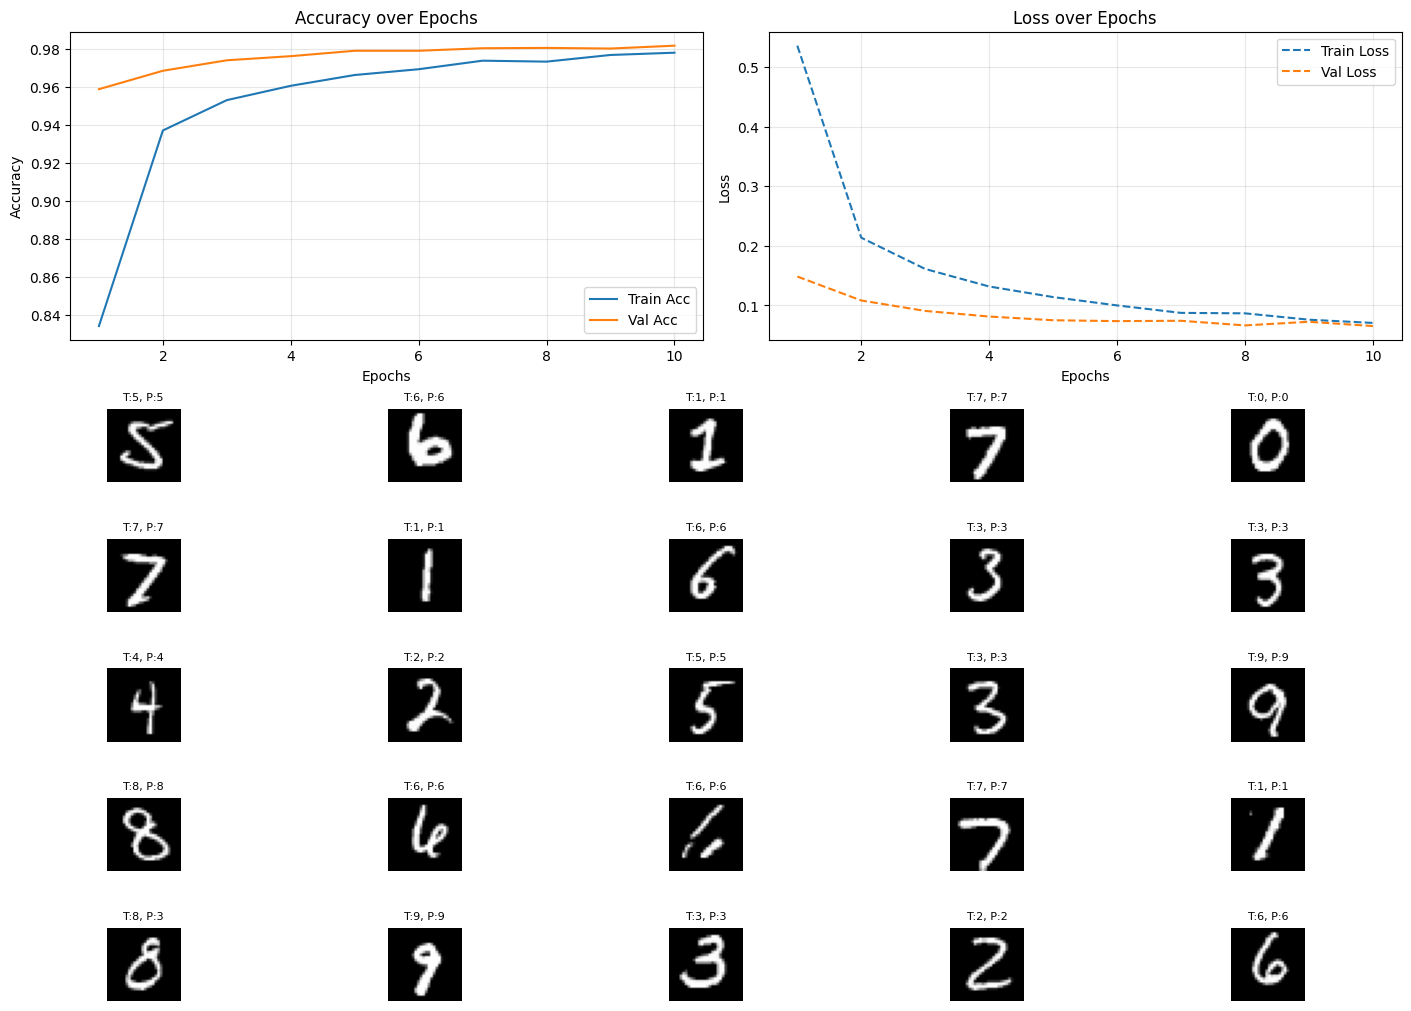

In [ ]:
# ----------------------------
# Predict External Image
# ----------------------------
def predict_external_image(model, img_path):
    """Load an external image, preprocess it, and predict the digit."""
    img = image.load_img(img_path, color_mode="grayscale", target_size=(28, 28))
    img_array = image.img_to_array(img).reshape(1, 28, 28)
    img_array = img_array.astype("float32") / 255.0

    probs = model.predict(img_array, verbose=0)[0]
    predicted_digit = np.argmax(probs)
    confidence = np.max(probs)

    print(f"Predicted Digit: {predicted_digit} (Confidence {confidence:.2f})")

    plt.imshow(img_array[0], cmap="gray")
    plt.title(f"Predicted: {predicted_digit}")
    plt.axis("off")
    plt.show()



model, x_test, y_test, history = train_model()

# Reload best saved model
if os.path.exists(MODEL_PATH):
    model = load_model(MODEL_PATH)

# 🔹 Show curves and predictions
plot_curves_and_outputs(history, model, x_test, y_test, n=25)